## Purpose:
This project is a simple project to demonstrate data analysis with python.  The data being explored is insurance information based off age, sex, bmi, number of children, smoking status, region of residence, and the insurance charge.

**What to expect in this project:**<br>
Loading data<br>
Examining the data for missing values and unique values<br>
Statistic Summary<br>
Data visualization<br>
Ending with some questions my instructor asked about the data<br>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import itertools 
import scipy
import math

In [2]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\insurance.csv')

In [3]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

**shape**

In [21]:
df1.shape

(1338, 7)

**data types & null values**

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Exploring the Features**

In [6]:
list1 = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

for i in list1:
    if len(df1[i].unique()) < 10:
        print('The unique values in column **',i,'** are:', df1[i].unique())
        print('The number of unique values in column **',i,'** is',len(df1[i].unique()))
        print('')
    
    else:
        print('The number of unique values in column **',i,'** is',len(df1[i].unique()))
        print('')

The number of unique values in column ** age ** is 47

The unique values in column ** sex ** are: ['female' 'male']
The number of unique values in column ** sex ** is 2

The number of unique values in column ** bmi ** is 548

The unique values in column ** children ** are: [0 1 3 2 5 4]
The number of unique values in column ** children ** is 6

The unique values in column ** smoker ** are: ['yes' 'no']
The number of unique values in column ** smoker ** is 2

The unique values in column ** region ** are: ['southwest' 'southeast' 'northwest' 'northeast']
The number of unique values in column ** region ** is 4

The number of unique values in column ** charges ** is 1337



**5 point summary**

In [7]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**distribution**

array([[<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>]],
      dtype=object)

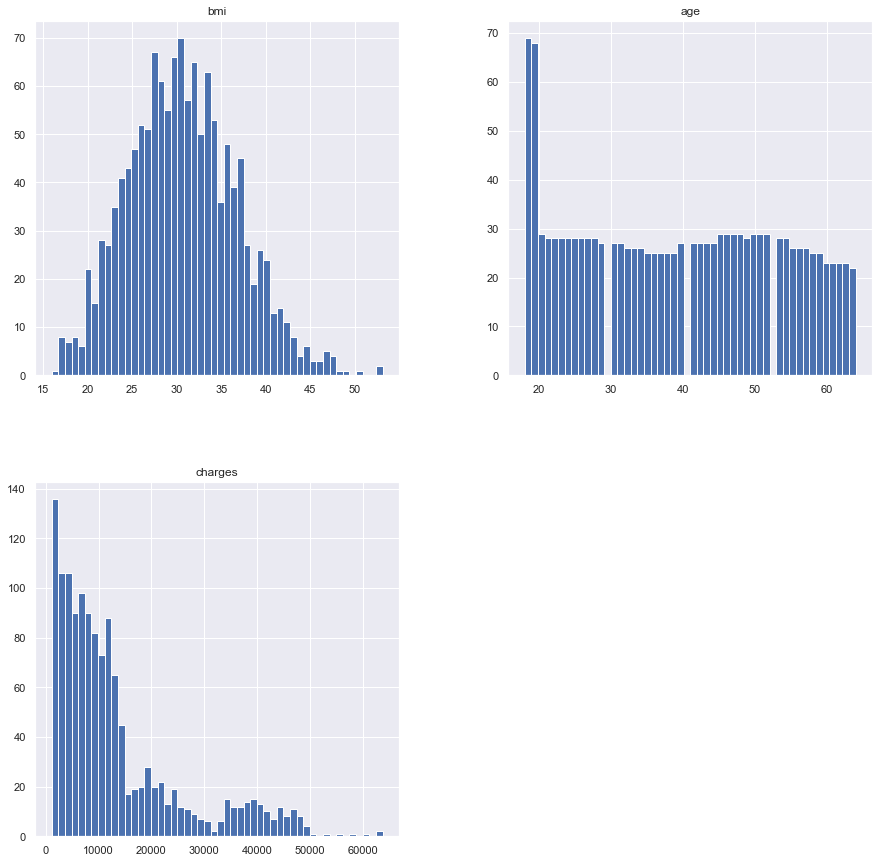

In [23]:
df1[['bmi','age','charges']].hist(bins=50, figsize=(15,15))

**skewness**

In [24]:
scipy.stats.skew(df1[['bmi','age','charges']])

array([0.28372857, 0.05561008, 1.51417971])

**outliers detection with boxplots**

In [13]:
list2 = ['smoker', 'region',]

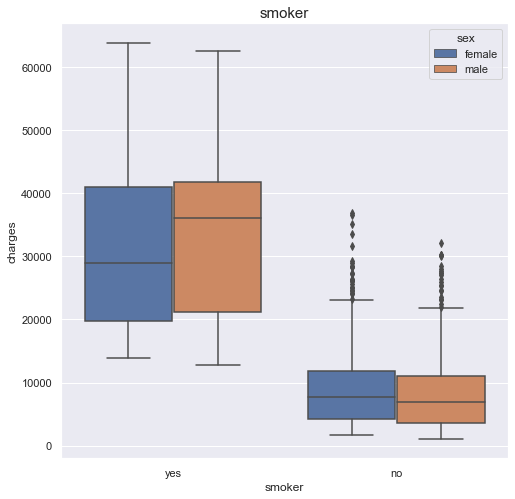

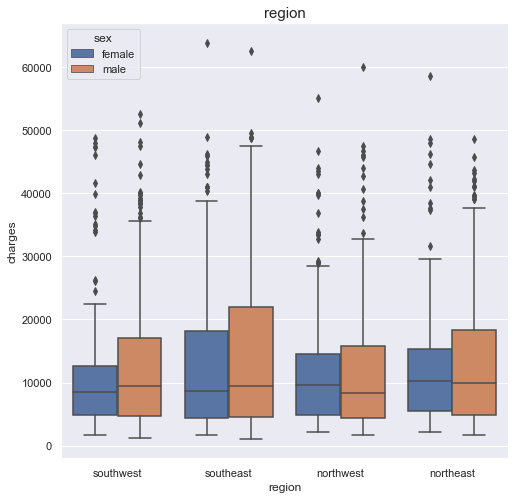

In [ ]:
for i in list2:
    plt.figure(figsize=(8,8))
    plt.title(i, fontsize=15)
    sns.boxplot(data=df1, x=i, y='charges', hue='sex')

**categorical distribution**

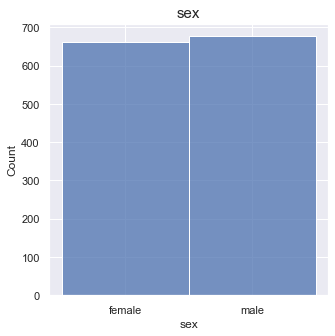

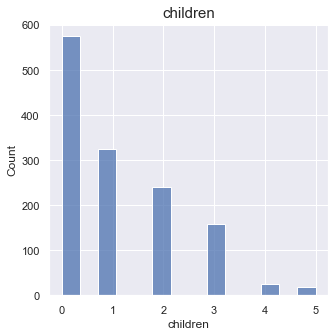

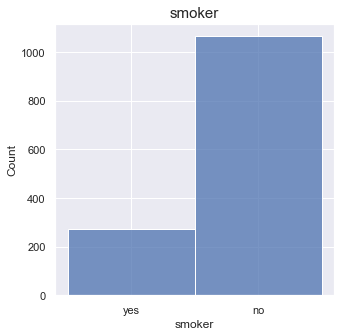

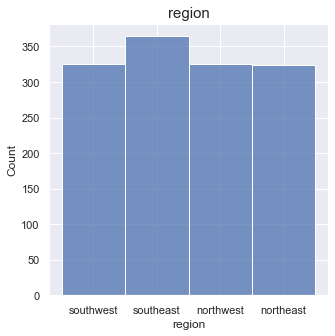

In [28]:
list4 = ['sex','children', 'smoker', 'region']
for i in list4:
    plt.figure(figsize=(5,5))
    plt.title(i,fontsize=15)
    sns.histplot(data=df1, x=i)

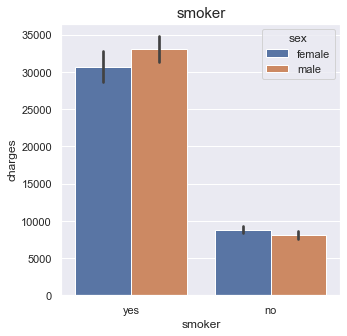

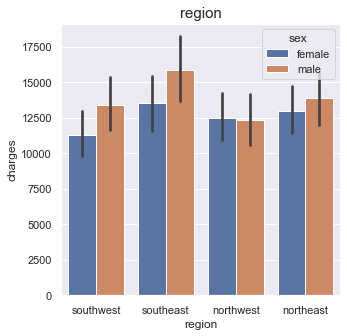

In [31]:
for i in list2:
    plt.figure(figsize=(5,5))
    plt.title(i, fontsize=15)
    sns.barplot(data=df1, x=i, y='charges', hue='sex')

**pair plot**

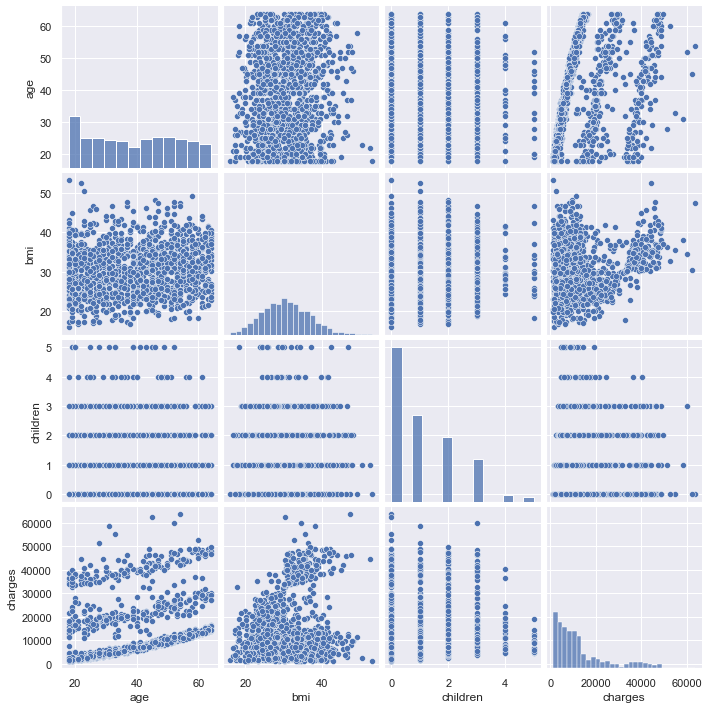

In [29]:
sns.pairplot(df1)

# Question

**Do charges of people who smoke differ significantly from the people who don't?**

Based on the graph below, yes.  But this exclused other features

<AxesSubplot:xlabel='smoker', ylabel='charges'>

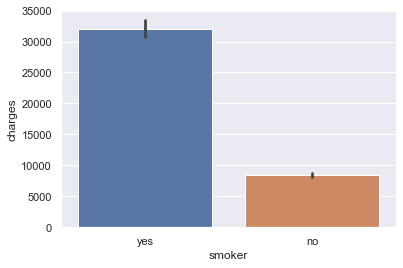

In [32]:
sns.barplot(data=df1, x='smoker', y='charges')

**Does bmi of males differ significantly from that of females?**

According to the histogram, they are approximetly the same distribution

<AxesSubplot:xlabel='bmi', ylabel='Count'>

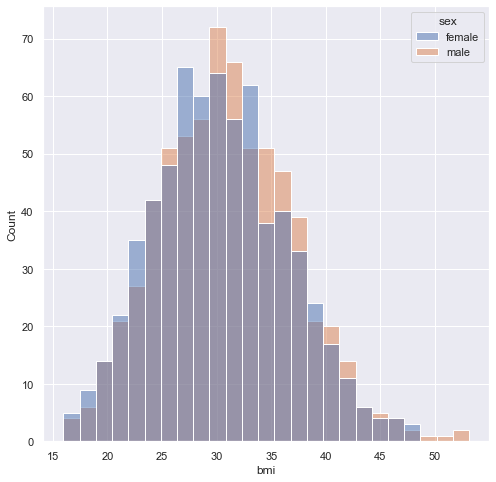

In [59]:
plt.figure(figsize=(8,8))
sns.histplot(data=df1, x='bmi', hue='sex')

**Is the proportion of smokers significantly different in different genders?**

According to the proportions dataframe I created below, it does not appear they are significnaly different

In [43]:
df3 = df1[['sex','smoker']]

In [44]:
df4 = pd.get_dummies(df3, columns=['smoker'])

In [48]:
df5 = df4.groupby('sex').sum()
df5['total'] = df5.sum(axis=1)


,smoker_no,smoker_yes,total
sex,,,
female,547.0,115.0,662.0
male,517.0,159.0,676.0


In [50]:
df5.div(df5['total'], axis=0)

,smoker_no,smoker_yes,total
sex,,,
female,0.826284,0.173716,1.0
male,0.764793,0.235207,1.0


**Is the distribution of bmi across women with no children, one child and two children, the same?**

According to the histogram below, they appear to be rightly the same

<AxesSubplot:xlabel='bmi', ylabel='Count'>

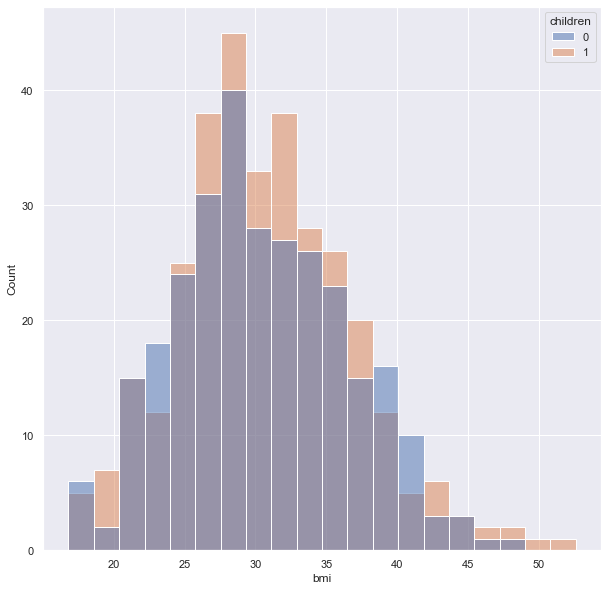

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(data=df1[(df1['sex']=='female') & (df1['children']== 0) | (df1['children']== 1)], x='bmi', hue='children', bins=20)